###  1. Predicting Customer Churn for Telecom Companies
#### Author: Sahith Todupunuri

#### 2. Background
 The project aims to build a predictive model to identify customers who are most likely to churn in the near future.Understanding which customers are likely to churn can save a company significant amounts of money and allow them to take targeted actions to retain those customers.


#### 3. Data 

Data Source : *[Kaggle](https://www.kaggle.com/datasets/priyankanavgire/telecom-churn)*. :link:


#### 3.1 *Importing Necessary Libraries*

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')
import missingno as msno


In [49]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


#### 3.2 *Importing the Data and Checking it*

In [50]:
churn = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [51]:
churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [52]:
#Each row represents a customer, each column contains customer’s attributes described on the column Metadata.


churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In our dataset:

We observed a category titled "Churn" which indicates customers who have discontinued our services in the past month.

Details regarding the specific services opted for by each customer are also available. These services encompass phone services, the option of multiple lines, internet access, features like online security and online backup, protection for their devices, technical support, and streaming options for both television shows and movies.

Moreover, the dataset provides insights into the customer's account details such as the duration for which they have been associated with us, the type of contract they hold, their preferred mode of payment, inclination towards paperless billing, monthly expenditure, and their cumulative charges.

On a demographic front, the data reveals the customer's gender, their age bracket, and information concerning whether they have a partner or any dependents.

In [53]:
churn.size

147903

In [54]:
churn.shape

(7043, 21)

In [55]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [56]:
churn.describe()


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


#### 3.3 *Visualizing missing values*

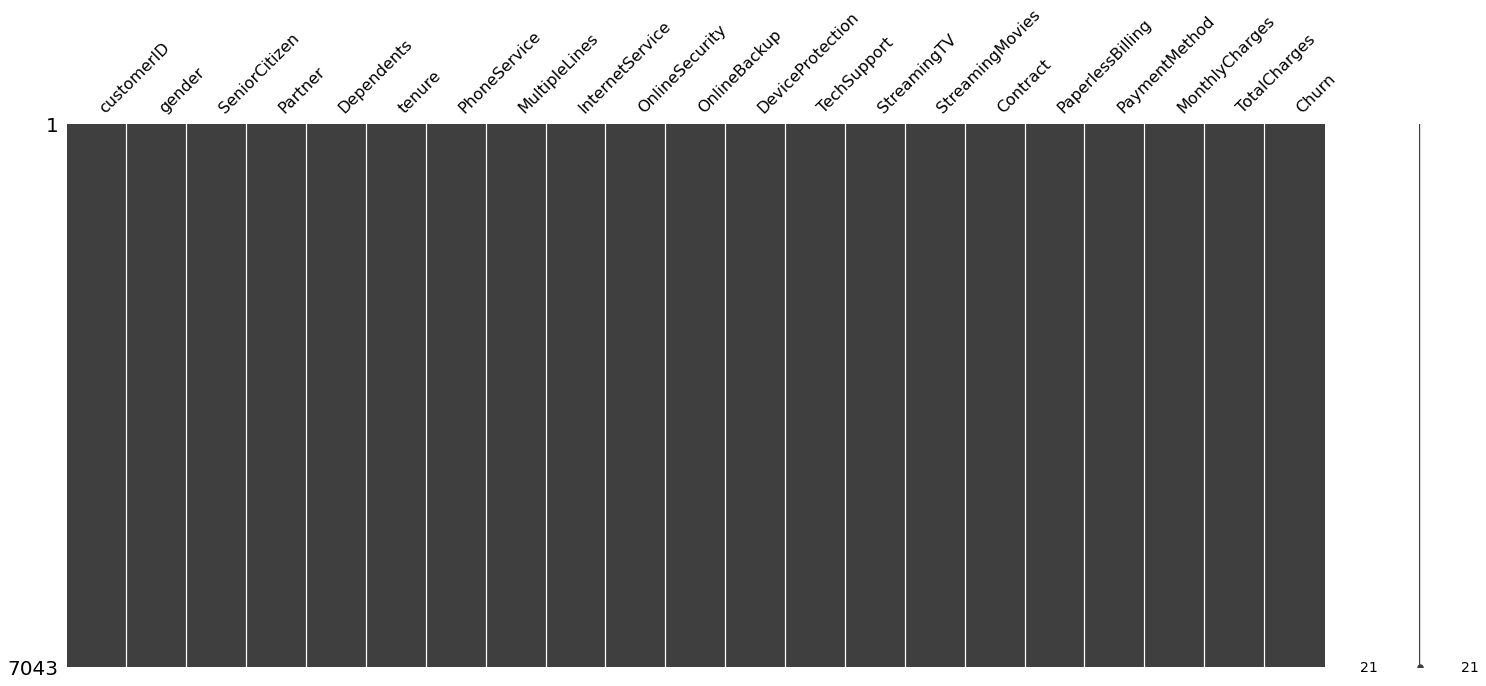

In [57]:
msno.matrix(churn);

Utilizing this matrix allows for an immediate identification of missing data patterns in the dataset.

From the visual representation provided, it's evident that there isn't any distinct or unusual pattern of missing data. Indeed, the dataset appears to be complete without any missing values

#### 3.4 *Exploratory Data Analysis*

In [58]:
churn['Churn'].value_counts()


No     5174
Yes    1869
Name: Churn, dtype: int64

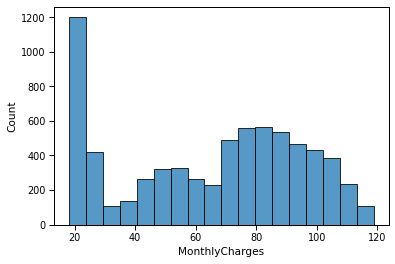

In [59]:
sns.histplot(churn['MonthlyCharges'])
plt.show()

In [60]:
churn['TotalCharges'] = pd.to_numeric(churn.TotalCharges, errors='coerce')
print(churn.isnull().sum())

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


It seems that TotalCharges has 11 missing values. Let's dig into the data

In [61]:
churn[np.isnan(churn['TotalCharges'])]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


The observation suggests that while the "Tenure" column displays a value of 0, the "MonthlyCharges" column still contains data for these records.
To further investigate if there are more instances where the "tenure" column holds a 0 value

In [62]:
zero_tenure_indices = churn[churn['tenure'].eq(0)].index
print(zero_tenure_indices)

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')


The "Tenure" column doesn't contain any further missing entries.
Given that only 11 rows have missing values in the "Tenure" column, we can safely remove them without significantly impacting the dataset.

In [63]:
churn.drop(labels=churn[churn['tenure'] == 0].index, axis=0, inplace=True)
churn[churn['tenure'] == 0].index

Int64Index([], dtype='int64')

In [64]:
churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [65]:
churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [19]:
churn["SeniorCitizen"] = churn["SeniorCitizen"].replace({0: "No", 1: "Yes"})
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [66]:
churn["InternetService"].value_counts()

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

In [67]:
churn["InternetService"].describe(include=['object', 'bool'])

count            7032
unique              3
top       Fiber optic
freq             3096
Name: InternetService, dtype: object

In [68]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
churn[numerical_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [69]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Directly use unique values from the dataframe for labels
g_labels = churn['gender'].unique()
c_labels = churn['Churn'].unique()

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=g_labels, values=churn['gender'].value_counts(), name="Gender"), 1, 1)
fig.add_trace(go.Pie(labels=c_labels, values=churn['Churn'].value_counts(), name="Churn"), 1, 2)

fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(title_text="Gender and Churn Distributions")
fig.show()


26.5 % of customers switched to another firm.
Customers are 49.5 % female and 50.5 % male.

In [70]:
churn["Churn"][churn["Churn"]=="No"].groupby(by=churn["gender"]).count()

gender
Female    2544
Male      2619
Name: Churn, dtype: int64

In [71]:
churn["Churn"][churn["Churn"]=="Yes"].groupby(by=churn["gender"]).count()

gender
Female    939
Male      930
Name: Churn, dtype: int64

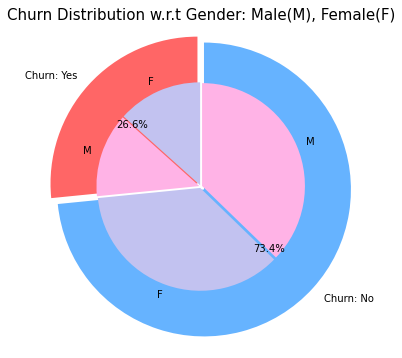

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))

# Main data
labels = ["Churn: Yes", "Churn: No"]
values = [1869, 5163]
colors = ['#ff6666', '#66b3ff']
explode = (0.3, 0.3)

# Gender distribution inside the main pie
labels_gender = ["F", "M", "F", "M"]
sizes_gender = [939, 930, 2544, 2619]
colors_gender = ['#c2c2f0', '#ffb3e6', '#c2c2f0', '#ffb3e6']
explode_gender = (0.1, 0.1, 0.1, 0.1)

# Plot main pie chart
plt.pie(values, labels=labels, colors=colors, startangle=90, explode=explode, radius=10, autopct='%1.1f%%')

# Plot inner pie chart for gender distribution
plt.pie(sizes_gender, labels=labels_gender, colors=colors_gender, startangle=90, explode=explode_gender, radius=7)

plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15)
plt.axis('equal')
plt.show()


There is negligible difference in customer percentage/ count who chnaged the service provider. Both genders behaved in similar fashion when it comes to migrating to another service provider/firm.


In [27]:
import plotly.express as px

fig = px.histogram(churn, x="Churn", color="Contract", title="Customer Contract Distribution", barmode="group")
fig.update_layout(width=650, height=450, bargap=0.15)
fig.show()


About 75% of customer with Month-to-Month Contract opted to move out as compared to 13% of customers with One Year Contract and 3% with Two Year Contract

In [37]:
fig = px.histogram(churn, x="Churn", color="PaymentMethod", title="<b>Customer Payment Method distribution w.r.t. Churn</b>")
#fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

Customers who chose Electronic Check as their payment method were the most likely to leave, while those who selected Credit Card automatic transfer or Bank Automatic Transfer, as well as Mailed Check, were more likely to stay with the service.

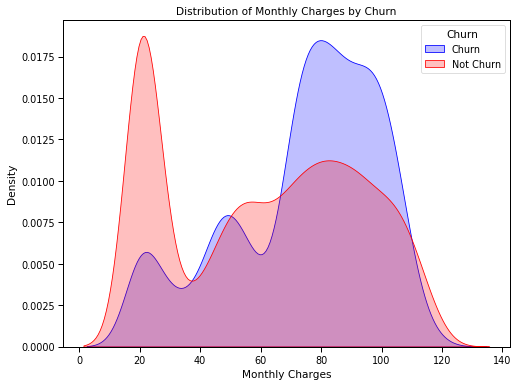

In [41]:
sns.set_context("paper", font_scale=1.1)

plt.figure(figsize=(8, 6))

sns.kdeplot(data=churn, x="MonthlyCharges", hue="Churn", common_norm=False, shade=True, palette={"No": "Red", "Yes": "Blue"})
plt.legend(title="Churn", labels=["Churn", "Not Churn"])
plt.ylabel('Density')
plt.xlabel('Monthly Charges')
plt.title('Distribution of Monthly Charges by Churn')

plt.show()


Customers with higher Monthly Charges are also more likely to churn

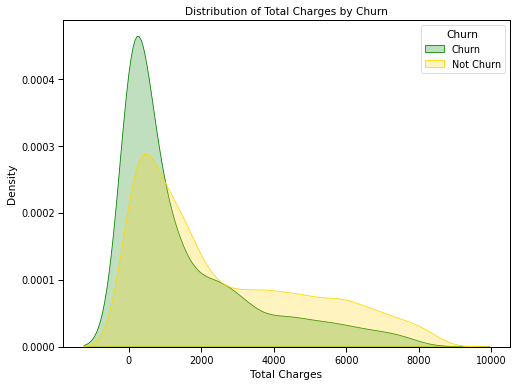

In [44]:
sns.set_context("paper", font_scale=1.1)

plt.figure(figsize=(8, 6))

sns.kdeplot(data=churn, x="TotalCharges", hue="Churn", common_norm=False, shade=True, palette={"No": "Gold", "Yes": "Green"})
plt.legend(title="Churn", labels=["Churn", "Not Churn"])
plt.ylabel('Density')
plt.xlabel('Total Charges')
plt.title('Distribution of Total Charges by Churn')

plt.show()


In [46]:
fig = px.box(churn, x='Churn', y = 'tenure')

# Update yaxis properties
fig.update_yaxes(title_text='Tenure (Months)', row=1, col=1)
# Update xaxis properties
fig.update_xaxes(title_text='Churn', row=1, col=1)

# Update size and title
fig.update_layout(autosize=True, width=750, height=600,
    title_font=dict(size=25, family='Courier'),
    title='<b>Tenure vs Churn</b>',
)

fig.show()

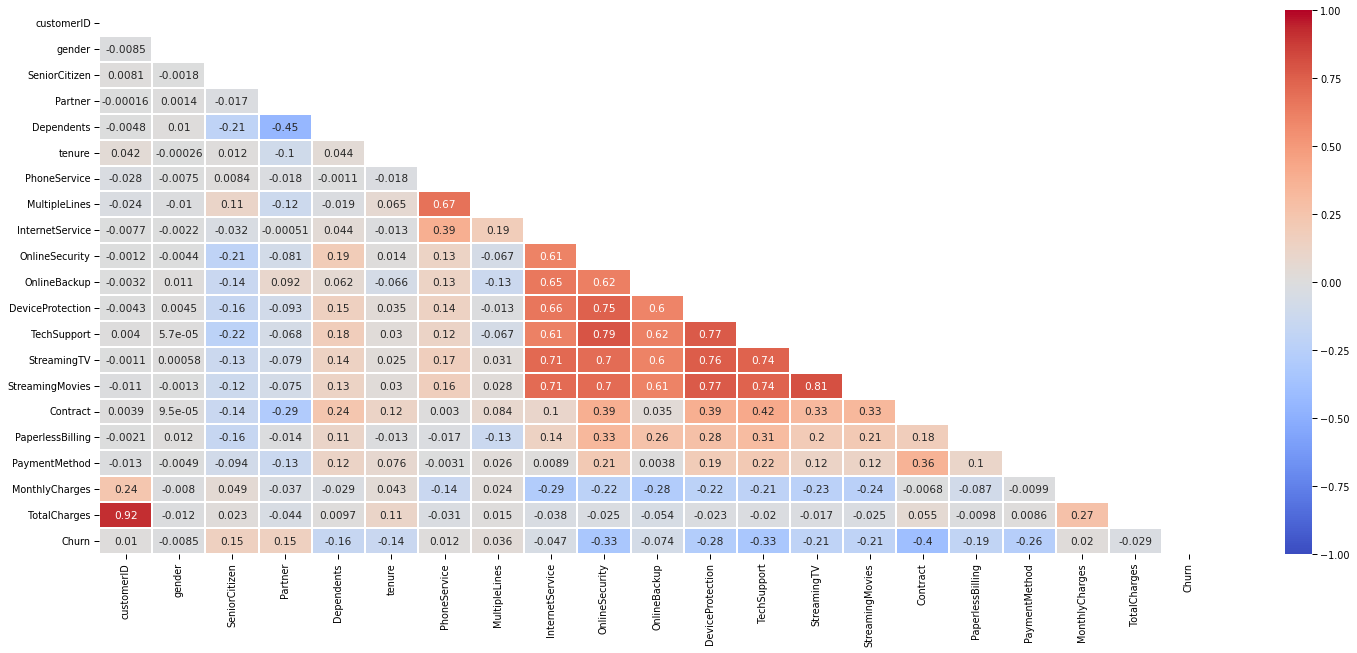

In [47]:
plt.figure(figsize=(25, 10))

corr = churn.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)